# Gaussian Process From Scratch

This code is based on <br>
**Fitting Gaussian Process Models in Python** <br>
by <br>
*Chris Fonnesbeck* <br>
https://domino.ai/blog/fitting-gaussian-process-models-python

In [3]:
import numpy as np
import matplotlib.pylab as plt

Gaussian Process is based on the multivariate Gaussian (normal) distribution and the summation and the conditioning properties <br>
see: https://cs229.stanford.edu/notes-spring2019/gaussian_processes.pdf

### Kernel to model the covariance
see: https://numpy.org/doc/stable/reference/generated/numpy.ufunc.outer.html 

In [25]:
def kernel(x, xprime, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, xprime)**2)

### Conditional density

In [26]:
def conditional(x_new, x, y, params):
    SigmaBA = kernel(x_new, x, params)
    SigmaAA = kernel(x, x, params)
    SigmaBB = kernel(x_new, x_new, params)
    mu = np.linalg.inv(SigmaAA).dot(SigmaBA.T).T.dot(y)
    sigma = SigmaBB - SigmaBA.dot(np.linalg.inv(SigmaAA).dot(SigmaBA.T))
    return(mu.squeeze(), sigma.squeeze())

### Assuming hyperparameters

In [27]:
θ = [1, 10]

### Data points

In [28]:
x = [-2.1, -1.5, 0.3, 1.8, 2.5]
y = [8, 7, 3, 0.1, -3]

### Predicting on new data points

In [29]:
x_pred = np.linspace(-3.0, 3.0, 1000)
predictions = [conditional(x_new, x, y, θ) for x_new in x_pred]

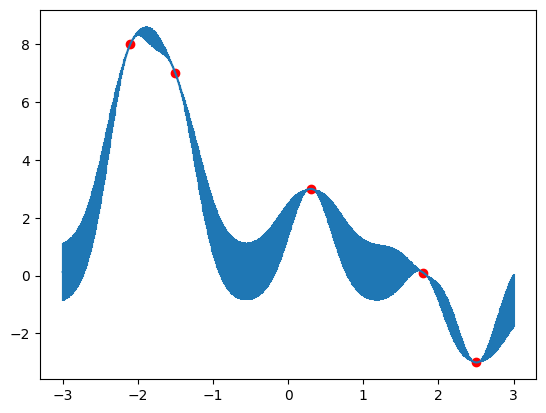

In [30]:
y_pred, sigmas = np.transpose(predictions)

plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

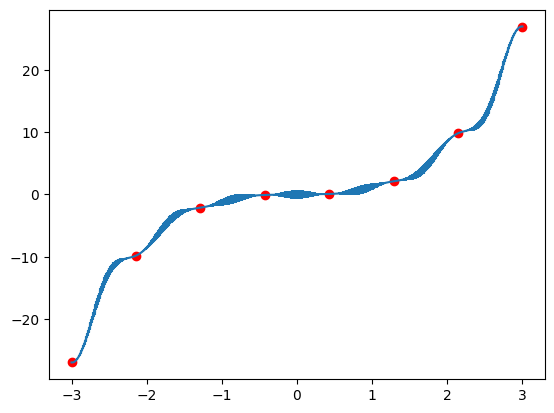

In [36]:
x_in = np.linspace(-3.0, 3.0, 8)
y_in = [np.power(xp,3) for xp in x_in]
#y_in = [np.sin(np.pi*xp/3.0) for xp in x_in]

predictions2 = [conditional(x_new, x_in, y_in, θ) for x_new in x_pred]

y_pred2, sigmas2 = np.transpose(predictions2)

plt.errorbar(x_pred, y_pred2, yerr=sigmas2, capsize=0)
plt.plot(x_in, y_in, "ro")